# WineQuality DataSet

## 1. Preprocessing

In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io

Download data

In [187]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep=';', quotechar='"', encoding='UTF-8')
df = df.replace('?', np.NaN)

Saving winequality-red.csv to winequality-red (2).csv


Print data

In [192]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [193]:
df.shape

(1599, 12)

In [194]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [195]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [196]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [197]:
df['fixed acidity'] = pd.Categorical(df['fixed acidity'])
df['volatile acidity'] = pd.Categorical(df['volatile acidity'])
df['citric acid'] = pd.Categorical(df['citric acid'])
df['residual sugar'] = pd.Categorical(df['residual sugar'])
df['chlorides'] = pd.Categorical(df['chlorides'])
df['free sulfur dioxide'] = pd.Categorical(df['free sulfur dioxide'])
df['total sulfur dioxide'] = pd.Categorical(df['total sulfur dioxide'])
df['density'] = pd.Categorical(df['density'])
df['pH'] = pd.Categorical(df['pH'])
df['sulphates'] = pd.Categorical(df['sulphates'])
df['alcohol'] = pd.Categorical(df['alcohol'])
df['quality'] = pd.Categorical(df['quality'])

## 2. Visualization

In [198]:
df_for_viz = df.copy()
for column in df_for_viz.select_dtypes(include='category').columns:
    df_for_viz[column] = df_for_viz[column].cat.codes

### All-vs-All correlation

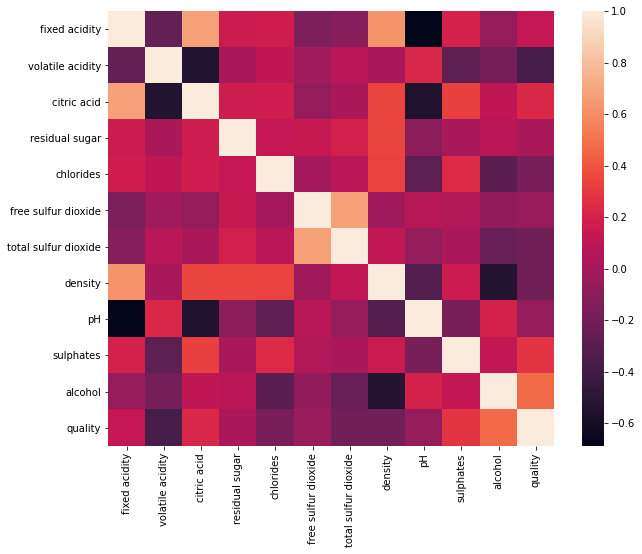

In [199]:
corr = df_for_viz.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

### Distribution plots

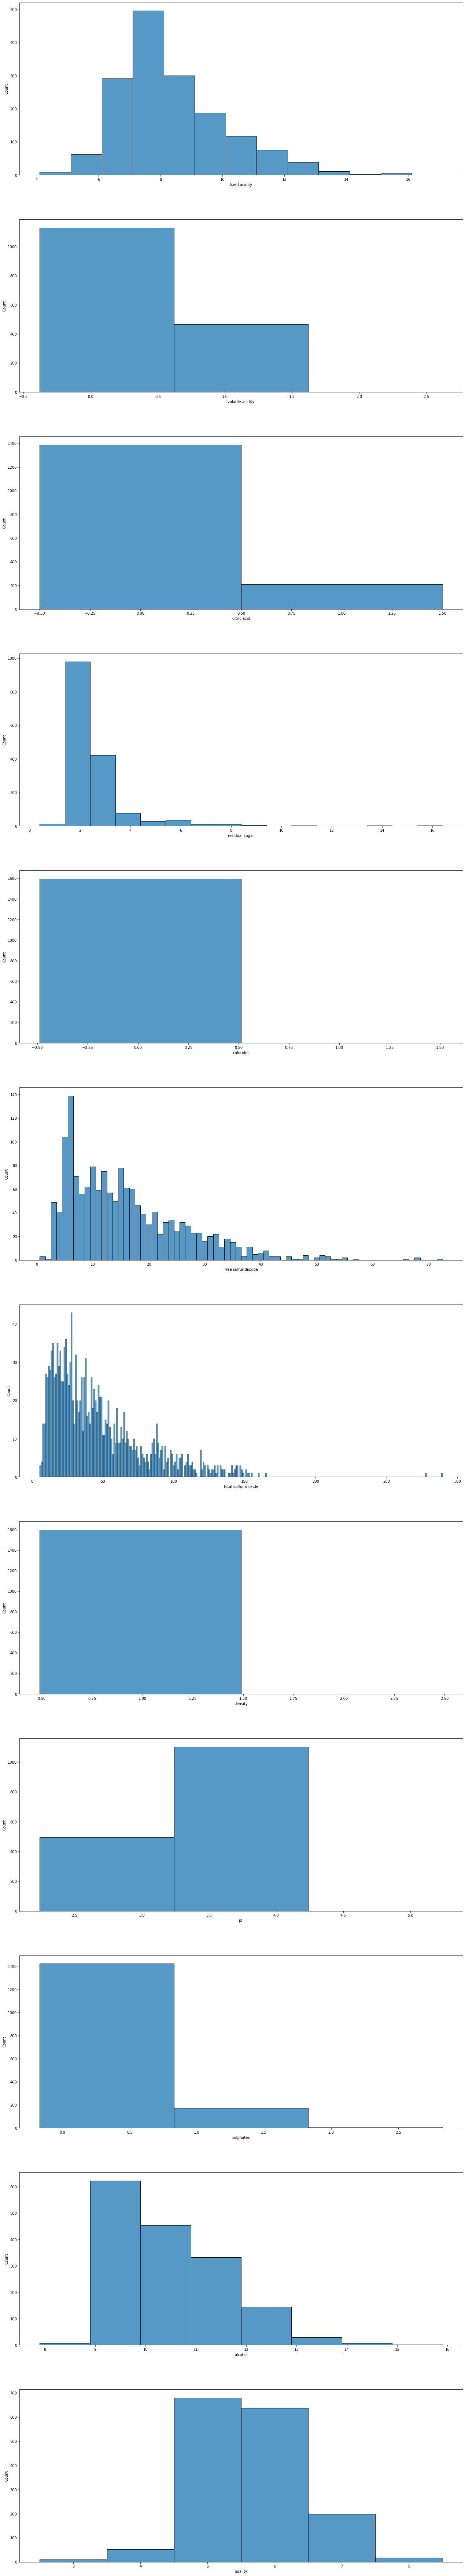

In [200]:
fig, axes = plt.subplots(nrows=12, ncols=1,figsize=(20,100))
fig.tight_layout(pad=10.0)
ax_iter = iter(axes.flat)
for column in df.columns:
    ax = next(ax_iter)
    df[column] = df[column].cat.as_ordered()
    a = sns.histplot(df[column],ax=ax)

### Boxplots conditioned on label

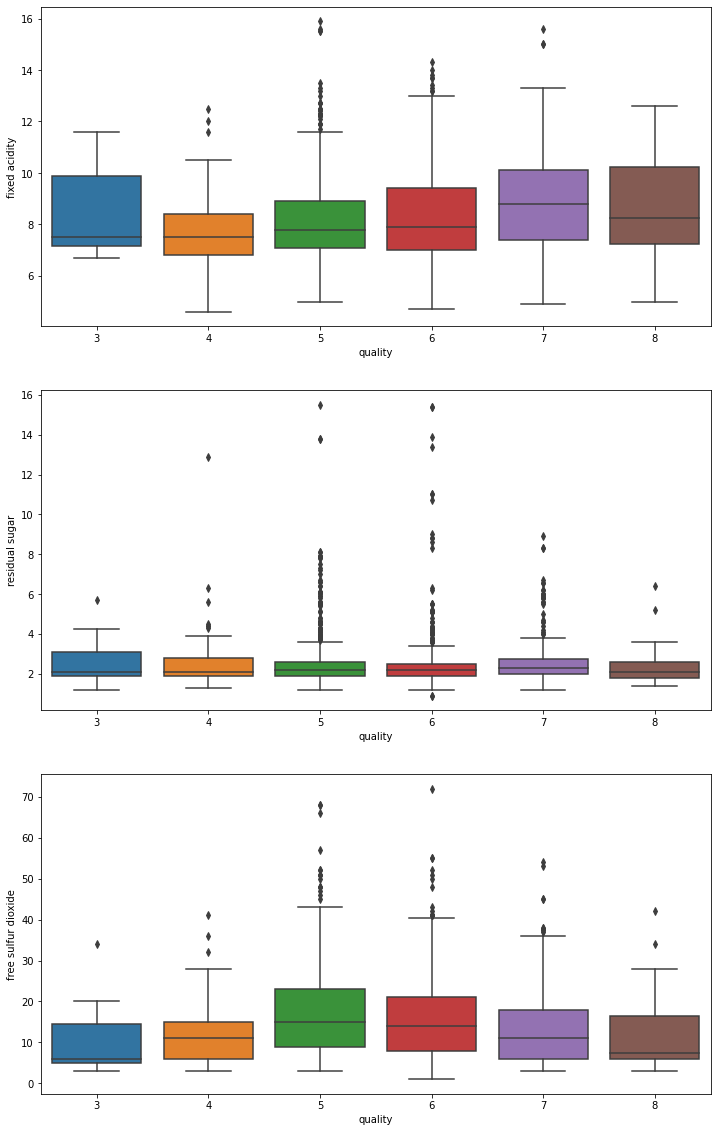

In [201]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,20))
ax_iter = iter(axes.flat)
for column in ['fixed acidity', 'residual sugar', 'free sulfur dioxide']:
    ax = next(ax_iter)
    df = df.explode(column)
    df[column] = df[column].astype('float')
    a = sns.boxplot(x='quality', y=column, data=df,ax=ax)

## 3. ML Time

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

### Splitting the dataset into the Training set and Test set

In [203]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

print(X_train.shape)

(1199, 11)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/__init__.py:199: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


### Logistic Regression

In [204]:
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
print('Clf Score:', clf.score(X_test, y_test.ravel()))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Clf Score: 0.56
f1 score: [0.         0.         0.66847826 0.55270655 0.12903226 0.        ]


### KNN

In [205]:
n_neighbors = list(range(10, 15))
hyperparameters = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train.ravel())
knn_n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']
print('Best n_neighbors:', knn_n_neighbors)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s


Best n_neighbors: 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


In [206]:
knn = KNeighborsClassifier(n_neighbors= knn_n_neighbors)
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_test)
print('Knn Score:', knn.score(X_test, y_test))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Knn Score: 0.5725
f1 score: [0.         0.         0.67036011 0.5297619  0.45783133 0.        ]


### Decision Tree

In [207]:
max_depth = [None, 5, 10, 15, 20, 25]
hyperparameters = dict(max_depth=max_depth)
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train.ravel())
dts_max_depth = best_model.best_estimator_.get_params()['max_depth']
print('Best max_depth:', dts_max_depth)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best max_depth: 5


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0220s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0393s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


In [208]:
dtc = DecisionTreeClassifier(max_depth=dts_max_depth)
dtc.fit(X_train,y_train.ravel())
y_pred = dtc.predict(X_test)
print('Dtc Score:', dtc.score(X_test, y_test))
print('f1 score', f1_score(y_test, y_pred, average=None))

Dtc Score: 0.5375
f1 score [0.         0.         0.66666667 0.47557003 0.34693878 0.        ]


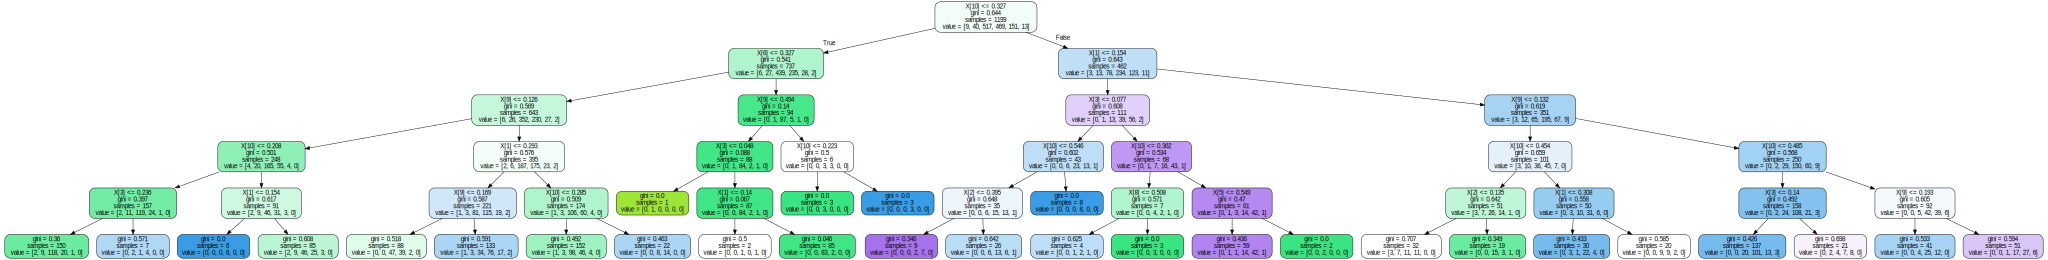

In [209]:
import graphviz
best_tree = dtc.fit(X_train, y_train.ravel())
dot_data = export_graphviz(best_tree, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format="png") 
graph

### SVM

In [210]:
c = [0.1, 1, 2]
gamma = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
kernel = ['rbf']
hyperparameters = dict(C=c, gamma=gamma, kernel=kernel)
svc = SVC()
clf = GridSearchCV(svc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train.ravel())
svm_C = best_model.best_estimator_.get_params()['C']
svm_gamma = best_model.best_estimator_.get_params()['gamma']
svm_kernel = best_model.best_estimator_.get_params()['kernel']
print('Best C:', svm_C)
print('Best gamma:', svm_gamma)
print('Best kernel:', svm_kernel)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0625s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1814s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.1s


Best C: 2
Best gamma: 1.0
Best kernel: rbf


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished


In [212]:
svc = SVC(C=svm_C, kernel=svm_kernel, gamma=svm_gamma)
svc.fit(X_train,y_train.ravel())
y_pred = svc.predict(X_test)
print('Svc Score:', svc.score(X_test, y_test))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Svc Score: 0.585
f1 score: [0.         0.         0.68319559 0.57777778 0.20689655 0.        ]


### Random Forest

In [213]:
n_estimators = [5, 10, 100, 200, 500]
max_depth = [None, 5, 10, 15, 20, 25]
min_samples_split = [0.1, 0.25, 0.5, 1, 2]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train.ravel())
rfc_n_estimators = best_model.best_estimator_.get_params()['n_estimators']
rfc_max_depth = best_model.best_estimator_.get_params()['max_depth']
rfc_min_samples_split = best_model.best_estimator_.get_params()['min_samples_split']
print('Best n_estimators:', rfc_n_estimators)
print('Best max_depth:', rfc_max_depth)
print('Best min_samples_split:', rfc_min_samples_split)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0436s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2084s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   25.4s
[Parallel(n_jo

Best n_estimators: 200
Best max_depth: 25
Best min_samples_split: 2


In [214]:
rfc = RandomForestClassifier(n_estimators=rfc_n_estimators, max_depth=rfc_max_depth, min_samples_split=rfc_min_samples_split)
rfc.fit(X_train,y_train.ravel())
y_pred = rfc.predict(X_test)
print('Rfc Score:', rfc.score(X_test, y_test))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Rfc Score: 0.68
f1 score: [0.         0.         0.75075075 0.68539326 0.54945055 0.        ]


### AdaBoost

In [215]:
n_estimators = [10, 50, 100, 500]
learning_rate = [0.1, 0.5, 1, 2, 5, 10]
algorithm = ['SAMME', 'SAMME.R']
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
abc = AdaBoostClassifier()
clf = GridSearchCV(abc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train.ravel())
abc_n_estimators = best_model.best_estimator_.get_params()['n_estimators']
abc_learning_rate = best_model.best_estimator_.get_params()['learning_rate']
abc_algorithm = best_model.best_estimator_.get_params()['algorithm']
print('Best n_estimators:', abc_n_estimators)
print('Best learning_rate:', abc_learning_rate)
print('Best algorithm:', abc_algorithm)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0412s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1314s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1927s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0705s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  96 ou

Best n_estimators: 500
Best learning_rate: 0.1
Best algorithm: SAMME


In [216]:
abc = AdaBoostClassifier(n_estimators=abc_n_estimators, learning_rate=abc_learning_rate, algorithm=abc_algorithm)
abc.fit(X_train,y_train.ravel())
y_pred = abc.predict(X_test)
print('Abc Score:', abc.score(X_test, y_test))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Abc Score: 0.565
f1 score: [0.         0.         0.67988669 0.54748603 0.23188406 0.        ]


### Gradient Boost

In [217]:
learning_rate = [0.01, 0.1, 0.5]
n_estimators = [100, 250, 500]
max_depth = [3, 5, 7]
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train.ravel())
gbc_learning_rate = best_model.best_estimator_.get_params()['learning_rate']
gbc_n_estimators = best_model.best_estimator_.get_params()['n_estimators']
gbc_max_depth = best_model.best_estimator_.get_params()['max_depth']
print('Best learning_rate:', gbc_learning_rate)
print('Best n_estimators:', gbc_n_estimators)
print('Best max_depth:', gbc_max_depth)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.3min finished


Best learning_rate: 0.01
Best n_estimators: 500
Best max_depth: 5


In [218]:
gbc = GradientBoostingClassifier(n_estimators=gbc_n_estimators, learning_rate=gbc_learning_rate, max_depth=gbc_max_depth)
gbc.fit(X_train,y_train.ravel())
y_pred = gbc.predict(X_test)
print('Gbc Score:', gbc.score(X_test, y_test))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Gbc Score: 0.6775
f1 score: [0.         0.25       0.75820896 0.67052023 0.57142857 0.        ]


# Best model by f1-score - GradientBoost

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.15      0.25        13
           2       0.74      0.77      0.76       164
           3       0.66      0.69      0.67       169
           4       0.60      0.54      0.57        48
           5       0.00      0.00      0.00         5

    accuracy                           0.68       400
   macro avg       0.44      0.36      0.38       400
weighted avg       0.68      0.68      0.67       400



In [220]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   1   0   0   0]
 [  0   2   5   6   0   0]
 [  2   1 127  33   1   0]
 [  1   0  37 116  13   2]
 [  0   0   1  20  26   1]
 [  0   0   0   2   3   0]]
